### $Read Function$

In [1]:
import pandas
def read_csv(filename,folder):
    folder=folder+"/"+filename+".csv"
    return pandas.read_csv(folder,encoding='ISO-8859-1')

### $Read Data$ 

In [2]:
folder="C:/Users/user/Desktop/NCCU_DB/DataBase/"
Fund_RT = read_csv(filename="Monthly_Fund_Return",folder=folder)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/user/Desktop/NCCU_DB/DataBase//Monthly_Fund_Return.csv'

### $15 Market Return Data$

In [6]:
import numpy
Market_RT = pandas.pivot_table(Fund_RT, values="RET1M",index=['DATAYM'],columns=['BNPNAME'],aggfunc=numpy.nanmean)

In [4]:
Market_RT.head()

BNPNAME,Asia Bond,Asia Equity,Creat China Equity,EmgMkt Bond,EmgMkt Equity,Europe Bond,Europe Equity,Global Bond,Global Equity,HY Bond,Multi Asset,Other Bond,Other Equity,US Bond,US Equity
DATAYM,,,,,,,,,,,,,,,
1998-01-01,-0.039289,0.018263,-0.146103,-0.011257,-0.087626,NaN,0.049667,-0.004647,0.027416,0.012305,0.017276,NaN,0.020335,0.013628,0.007262
1998-02-01,0.022395,0.152172,0.211970,0.019226,0.066874,NaN,0.053407,0.004307,0.060408,0.011483,0.032005,NaN,0.066836,-0.002585,0.073046
1998-03-01,0.019048,-0.020647,-0.013030,0.021443,0.056531,NaN,0.131466,0.000610,0.032653,0.010458,0.022785,NaN,0.016089,0.002682,0.045601
1998-04-01,0.009346,-0.066518,-0.086579,0.000802,0.010489,NaN,0.022651,0.003083,0.034506,0.007557,0.000000,NaN,0.038821,0.003856,0.011689
1998-05-01,-0.002778,-0.139948,-0.138911,-0.025352,-0.115644,NaN,0.060068,0.005683,-0.037524,-0.003364,-0.009901,NaN,-0.069077,0.009788,-0.033858


### $Portfolio Return Function$

In [5]:
def port_return(weight,start,end,data=Market_RT):
    # weight : dictionary, key=market, value=weight
    # start : string, start date
    # end : string, end date
    # data : Market return data
    w = list(weight.values())
    data = data.loc[start:end,list(weight.keys())]
    return (w*data).sum(axis=1)

In [6]:
example= port_return(weight={"Asia Equity":0.2, "US Equity":0.4, "US Bond":0.4}
                    ,start='1998-01-01'
                    ,end='2018-06-01')
example

DATAYM
1998-01-01    0.012009
1998-02-01    0.058619
1998-03-01    0.015184
1998-04-01   -0.007086
1998-05-01   -0.037617
                ...   
2016-08-01    0.005455
2016-09-01    0.005213
2016-10-01   -0.013034
2016-11-01    0.007591
2016-12-01    0.005319
Length: 228, dtype: float64

### $Accumulated Return Method$

In [7]:
example_acc = (1+example).cumprod()-1
example_acc

DATAYM
1998-01-01    0.012009
1998-02-01    0.071332
1998-03-01    0.087599
1998-04-01    0.079893
1998-05-01    0.039270
                ...   
2016-08-01    2.323611
2016-09-01    2.340937
2016-10-01    2.297391
2016-11-01    2.322422
2016-12-01    2.340094
Length: 228, dtype: float64

### $MDD Function$

In [8]:
import numpy
def maxdrawdown(xs):
    e = numpy.argmax(numpy.maximum.accumulate(xs) - xs) # end of the period
    s = numpy.argmax(xs[:e]) # start of period
    return (xs[e]-xs[s])/xs[s]

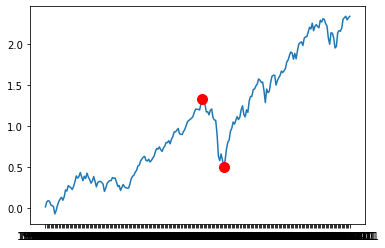

In [9]:
import matplotlib.pyplot as plt
xs = example_acc
e = numpy.argmax(numpy.maximum.accumulate(xs) - xs) # end of the period
s = numpy.argmax(xs[:e]) # start of period

plt.plot(xs)
plt.plot([e, s], [xs[e], xs[s]], 'o', color='Red', markersize=10)

In [106]:
maxdrawdown(1+example_acc)

-0.3593207152782289

### $Evaluate MVO Score$
> $1. Fund Return (2017/1/1表示2017年1月份投報率)$

In [7]:
Fund_RT_TEST = read_csv(filename="Monthly_Fund_Return_Test",folder=folder)
Fund_RT_TEST = pandas.pivot_table(Fund_RT_TEST, values="RET1M",index=['DATAYM'],columns=['PERFORMANCEID'],aggfunc=numpy.nanmean)

In [8]:
Fund_RT_TEST.head()

PERFORMANCEID,0P00000AMR,0P00000AMS,0P00000AMT,0P00000AMU,0P00000AMY,0P00000AMZ,0P00000AN0,0P00000AN4,0P00000ANE,0P00000ANF,...,0P0001HRJM,0P0001HRKK,0P0001HV2D,0P0001HV2F,0P0001HV2G,0P0001HV2H,0P0001HV2U,0P0001HV2W,0P0001HV2Y,0P0001HV2Z
DATAYM,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.052065,0.014790,0.015403,0.0453,0.0593,0.0003,0.0458,0.0024,0.0006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,0.006183,0.001839,0.002431,0.0316,0.0129,0.0005,0.0319,0.0045,0.0006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,0.011282,0.042966,0.043673,0.0346,0.0350,0.0005,0.0352,0.0050,0.0008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,0.069663,0.040134,0.040439,0.0433,0.0401,0.0005,0.0436,-0.0018,0.0007,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,0.024489,0.039079,0.039388,0.0355,0.0374,0.0007,0.0359,0.0009,0.0008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> $2.Weight (2017/1/1表示當天進行資產配置)$

In [9]:
Weight_Test_MVO = pandas.read_csv("C:/Users/user/Desktop/NCCU_DB/DataBase/Weight_Test_MVO.csv",encoding='ISO-8859-1',index_col=['DATAYM'],parse_dates=True).sort_values(by='DATAYM').fillna(0)
Weight_Test_MVO.head()

,0P00006AH4,0P00000KGG,0P00002DB5,0P00002D82,0P00006AL0,0P00002DB8,0P00001DUV,0P00000M8C,0P00002D9Z,0P00000ZJJ,0P00001DU1,0P00006AL8,0P00000AXZ,0P00000OVY,0P00006ACB,0P00000AV2,0P000020IN,0P00000BUK,0P00001BHA
DATAYM,,,,,,,,,,,,,,,,,,,
2017-01-01,0.0,0.00,0.24,0.4,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.00,0.05
2017-02-01,0.0,0.00,0.24,0.4,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.00,0.05
2017-03-01,0.0,0.01,0.24,0.4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.05,0.00
2017-04-01,0.0,0.01,0.24,0.4,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.05,0.00
2017-05-01,0.0,0.00,0.24,0.4,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.05,0.00


> $Portfolio Return Function$

In [10]:
def port_return_test(weight,start,end,data=Fund_RT_TEST):
    # weight : dataframe, RL/MVO weight
    # start : string, start date
    # end : string, end date
    # data : dataframe, test data
    rest = data.loc[start:end,weight.columns]*weight
    return rest.sum(axis=1)

> $MVO Portfolio Return$

In [57]:
MVO_RT = port_return_test(weight=Weight_Test_MVO,
                          start='2017-01-01',
                          end='2019-06-01',
                          data=Fund_RT_TEST)

> $MVO Portfolio Accumulate Return$

In [59]:
MVO_RT_acc = (1+MVO_RT).cumprod()-1
End_value = MVO_RT_acc[-1]
End_value

0.35821317014676946

>***CAGR=(End Value/Begin Value)^(1/years)-1 - 績效評分指標***

In [60]:
def CAGR(xs):
    ts = pandas.to_datetime(xs.index)
    ys = ((ts[-1]-ts[1]).days)/365   
    return ((1+xs[-1])/(1+xs[1]))**(1/ys)-1

In [61]:
CAGR(MVO_RT_acc)

0.11035466227572588

> $MVO Max Draw down - 風險評分指標$

In [105]:
maxdrawdown(1+MVO_RT_acc)

-0.09866070712468698

In [168]:
Weight_Test_MVO = pandas.read_csv("C:/Users/user/Desktop/NCCU_DB/DataBase/Weight_Test_MVO.csv",encoding='ISO-8859-1',index_col=['DATAYM'],parse_dates=True).sort_values(by='DATAYM')
Weight_Test_MVO.head()

,0P00006AH4,0P00000KGG,0P00002DB5,0P00002D82,0P00006AL0,0P00002DB8,0P00001DUV,0P00000M8C,0P00002D9Z,0P00000ZJJ,0P00001DU1,0P00006AL8,0P00000AXZ,0P00000OVY,0P00006ACB,0P00000AV2,0P000020IN,0P00000BUK,0P00001BHA
DATAYM,,,,,,,,,,,,,,,,,,,
2017-01-01,NaN,NaN,0.24,0.4,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,0.05
2017-02-01,NaN,NaN,0.24,0.4,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,NaN,0.05
2017-03-01,NaN,0.01,0.24,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.05,NaN
2017-04-01,NaN,0.01,0.24,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.05,NaN
2017-05-01,NaN,NaN,0.24,0.4,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.05,NaN


<div class="alert alert-block alert-info">
<b>測試期間評分標準</b><br>
    <b>1. 需符合下列條件</b><br>
     (1) 每一期股票型基金配置權重不得超過75%<br>
     (2) 每一期建議基金數不得超過10檔基金<br>
</div>